# Data

Data is perhaps the most important aspect of Structural Dynamics.  There are many different types of data that one may encounter in Structural Dynamics, from the simple time history tracking some quantity of interest over time, to more complex transfer functions, shock response spectra, or power spectral density matrices.  Data objects in SDynPy can be viewed as somewhat of a "work in progress", where commonly used data types such as time histories or transfer functions have a great deal of functionality defined for them, while less commonly used data types such as the correlation array have almost no specific functionality defined.  Generally, functionality is added as it is required to be used, and with the main authors of SDynPy primarily working in vibration and modal analysis fields, users will find that types of data used in these fields are more fleshed out with functionality.

This document will demonstrate how data is defined and used in SDynPy.  It will document basic operations that can be performed on data.  Many SDynPy data objects also contain signal processing functionality; however, to reign in the scope of this document, signal processing operations will be discussed in later documentation.

Let's import SDynPy and start looking at Data!

In [1]:
%gui qt
import sdynpy as sdpy
import numpy as np

## SDynPy Data Objects

In [2]:
num_sines = 10
frequencies = np.arange(num_sines)*10
timesteps = np.arange(1000)/1000
signal = np.sin(2*np.pi*frequencies[:,np.newaxis]*timesteps) # Will broadcast to a 10x1000 array
coordinate = sdpy.coordinate_array(1,'X+')

time_history = sdpy.time_history_array(
    abscissa = timesteps,
    ordinate = signal,
    coordinate = coordinate,
    comment1 = "A Comment",
    comment2 = "Another Comment",
    comment3 = "A Third Comment",
    comment4 = "A Fourth Comment",
    comment5 = "One Last Comment"
)

In [3]:
time_history.fields

('abscissa',
 'ordinate',
 'comment1',
 'comment2',
 'comment3',
 'comment4',
 'comment5',
 'coordinate')

In [4]:
time_history.dtype

dtype([('abscissa', '<f8', (1000,)), ('ordinate', '<f8', (1000,)), ('comment1', '<U80'), ('comment2', '<U80'), ('comment3', '<U80'), ('comment4', '<U80'), ('comment5', '<U80'), ('coordinate', [('node', '<u8'), ('direction', 'i1')], (1,))])

In [5]:
time_history.dtype['coordinate']

dtype(([('node', '<u8'), ('direction', 'i1')], (1,)))

In [6]:
# Create a dummy coordinate array so we can see its dtype
sdpy.coordinate_array(1,1).dtype

dtype([('node', '<u8'), ('direction', 'i1')])

In [7]:
time_history.coordinate

coordinate_array(string_array=
array([['1X+'],
       ['1X+'],
       ['1X+'],
       ['1X+'],
       ['1X+'],
       ['1X+'],
       ['1X+'],
       ['1X+'],
       ['1X+'],
       ['1X+']], dtype='<U3'))

In [8]:
freqs = np.arange(1000)
ordinate = np.random.randn(1000)
coordinate = sdpy.coordinate_array([1,2],'X+') # Uses broadcasting
tf = sdpy.transfer_function_array(
    abscissa = freqs,
    ordinate = ordinate,
    coordinate = coordinate
)

tf.dtype

dtype([('abscissa', '<f8', (1000,)), ('ordinate', '<c16', (1000,)), ('comment1', '<U80'), ('comment2', '<U80'), ('comment3', '<U80'), ('comment4', '<U80'), ('comment5', '<U80'), ('coordinate', [('node', '<u8'), ('direction', 'i1')], (2,))])

In [9]:
time_history.shape

(10,)

If we then look at the ``coordinate`` field, which has ``dtype`` with shape ``(1,)``, we should see its shape be ``(10,1)``.

In [10]:
time_history.coordinate.shape

(10, 1)

In [11]:
time_history.ordinate.shape

(10, 1000)

## Creating Data from Scratch

In [12]:
# We will use broadcasting to help us construct these arrays.
frequencies = ((np.arange(5)+1)*10)[:,np.newaxis,np.newaxis] # Frequency is the first dimension
phases = (np.arange(2)*np.pi/2)[:,np.newaxis] # Phase is the second dimension
timesteps = np.arange(1000)/1000 # Timestep is the last dimension.
signal_ordinate = np.sin(2*np.pi*frequencies*timesteps+phases) # 3D broadcasting occuring in this last function.

# Check the shape
signal_ordinate.shape

(5, 2, 1000)

In [13]:
coordinates = sdpy.coordinate_array( # Use broadcasting to get 5x2
    np.arange(5)[:,np.newaxis]+1,    # Nodes have shape 5x1
    ['X+','Y+']                      # Directions have shape 2
    )[...,np.newaxis]                # Add the newaxis at the end

# Check the size
coordinates.shape

(5, 2, 1)

In [14]:
time_histories = sdpy.time_history_array(
    abscissa = timesteps,
    ordinate = signal_ordinate,
    coordinate = coordinates
)

If we want to know more about our data, we can simply type its name into the terminal. 

In [15]:
time_histories

TimeHistoryArray with shape 5 x 2 and 1000 elements per function

In [16]:
# We will use broadcasting to help us construct these arrays.
frequencies = ((np.arange(5)+1)*10)[:,np.newaxis,np.newaxis] # Frequency is the first dimension
phases = (np.arange(2)*np.pi/2)[:,np.newaxis] # Phase is the second dimension
timesteps = np.arange(1000)/1000 # Timestep is the last dimension.
signal_ordinate = np.sin(2*np.pi*frequencies*timesteps+phases) + 1j*np.cos(2*np.pi*frequencies*timesteps+phases) # 3D broadcasting occuring in this last function.

# Check the shape
signal_ordinate.shape

(5, 2, 1000)

We will also need to compute a ``coordinate`` field with size ``(5,2,2)`` where the last ``2`` is due to the shape of the ``coordinate`` field's ``dtype``.   Here we will not use ``np.newaxis`` because the new axis we need must have length 2 instead of length 1.  We will instead rely entirely on broadcasting.

In [17]:
coordinates = sdpy.coordinate_array(            # Use broadcasting to get 5x2x2
    np.arange(5)[:,np.newaxis,np.newaxis]+1,    # Nodes have shape 5x1x1
    [['X+','Z+'],
     ['Y+','Z+']]                               # Directions have shape 2 x 2
    )

# Check the size
coordinates.shape

(5, 2, 2)

In [18]:
tfs = sdpy.transfer_function_array(
    abscissa = timesteps,
    ordinate = signal_ordinate,
    coordinate = coordinates
)

Again, we can type the name into the terminal to get more information.

In [19]:
tfs

TransferFunctionArray with shape 5 x 2 and 1000 elements per function

## Visualizing Data

<Axes: >

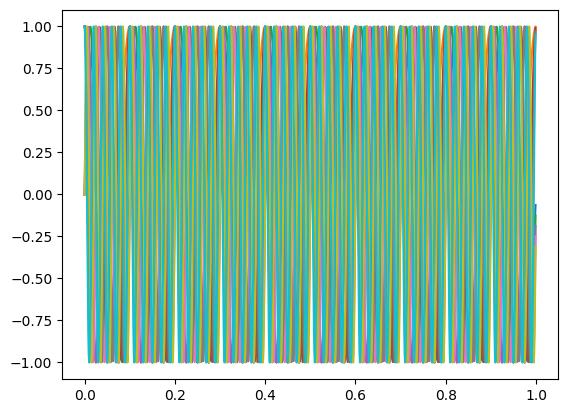

In [20]:
time_histories.plot()

We can see by simply calling the ``plot`` method, it has plotted all of the time histories on a single figure.  This may or may not be desirable.  If many functions are plotted, the plots may get busy and hard to read.  The ``one_axis`` argument of the function, which defaults to ``True`` can be set to ``False`` to plot all figures on separate plots.

array([[<Axes: ylabel='1X+'>, <Axes: ylabel='1Y+'>, <Axes: ylabel='2X+'>],
       [<Axes: ylabel='2Y+'>, <Axes: ylabel='3X+'>, <Axes: ylabel='3Y+'>],
       [<Axes: ylabel='4X+'>, <Axes: ylabel='4Y+'>, <Axes: ylabel='5X+'>],
       [<Axes: ylabel='5Y+'>, <Axes: >, <Axes: >]], dtype=object)

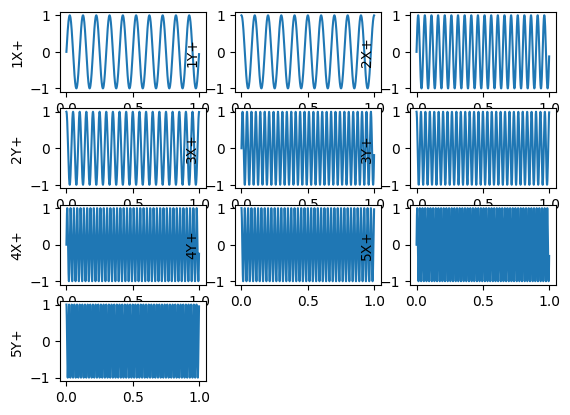

In [21]:
time_histories.plot(one_axis=False)

This may also produce varying levels of success depending on how many plots are plotted on the figure.  Note in the above, the axis labels overlay the adjacent plots.  To accomodate this, the ``plot`` method also takes optional arguments to allow us to customize the result and make it look more appealing.  These arguments are generally keyword arguments to the lower level Matplotlib function calls.

array([[<Axes: ylabel='1X+'>, <Axes: ylabel='1Y+'>, <Axes: ylabel='2X+'>],
       [<Axes: ylabel='2Y+'>, <Axes: ylabel='3X+'>, <Axes: ylabel='3Y+'>],
       [<Axes: ylabel='4X+'>, <Axes: ylabel='4Y+'>, <Axes: ylabel='5X+'>],
       [<Axes: ylabel='5Y+'>, <Axes: >, <Axes: >]], dtype=object)

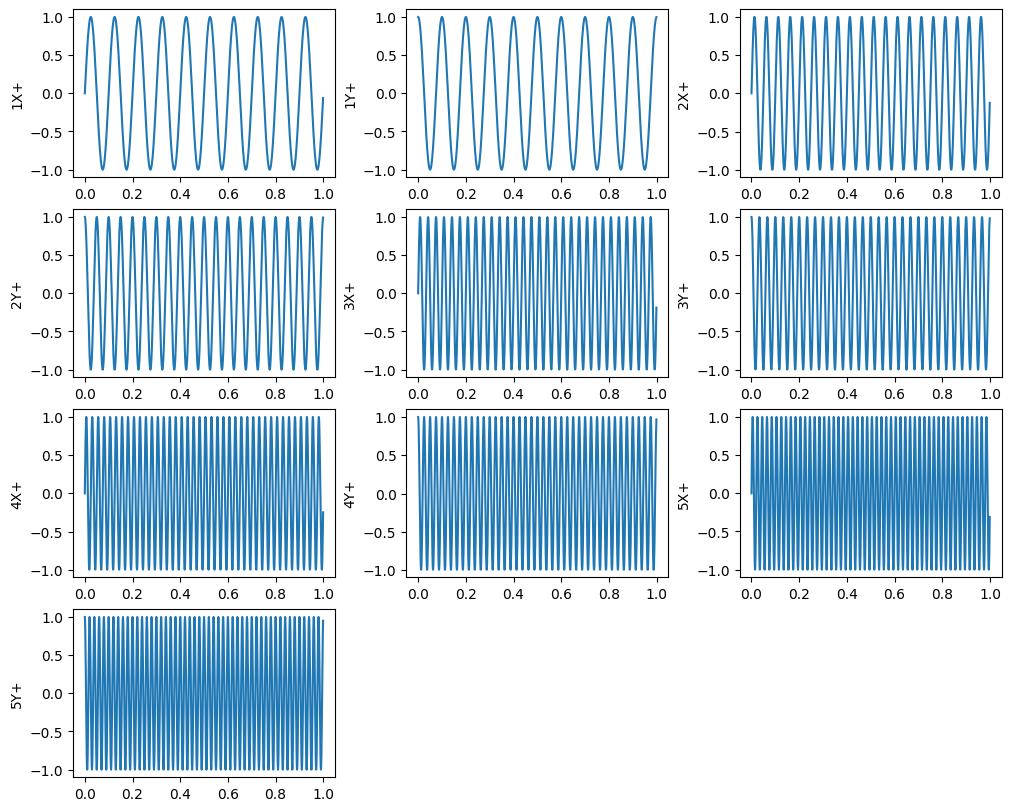

In [22]:
time_histories.plot(one_axis=False,subplots_kwargs={'layout':'constrained','figsize':(10,8)})

array([<Axes: ylabel='Phase'>,
       <Axes: xlabel='Frequency', ylabel='Amplitude'>], dtype=object)

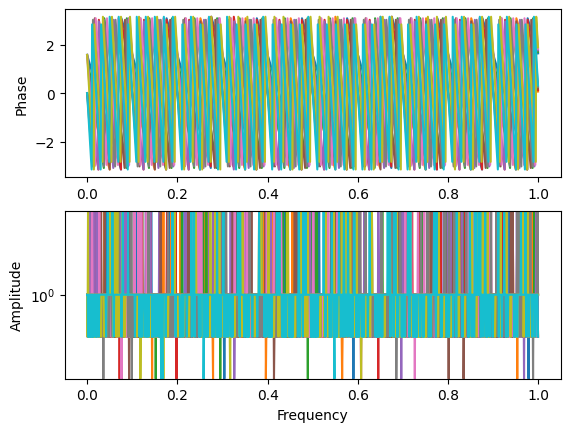

In [23]:
tfs.plot()

If we plot on multiple axes, we can see that it will by default plot the magnitude of the transfer function.

array([[<Axes: ylabel='1X+/1Z+'>, <Axes: ylabel='1Y+/1Z+'>,
        <Axes: ylabel='2X+/2Z+'>],
       [<Axes: ylabel='2Y+/2Z+'>, <Axes: ylabel='3X+/3Z+'>,
        <Axes: ylabel='3Y+/3Z+'>],
       [<Axes: ylabel='4X+/4Z+'>, <Axes: ylabel='4Y+/4Z+'>,
        <Axes: ylabel='5X+/5Z+'>],
       [<Axes: ylabel='5Y+/5Z+'>, <Axes: >, <Axes: >]], dtype=object)

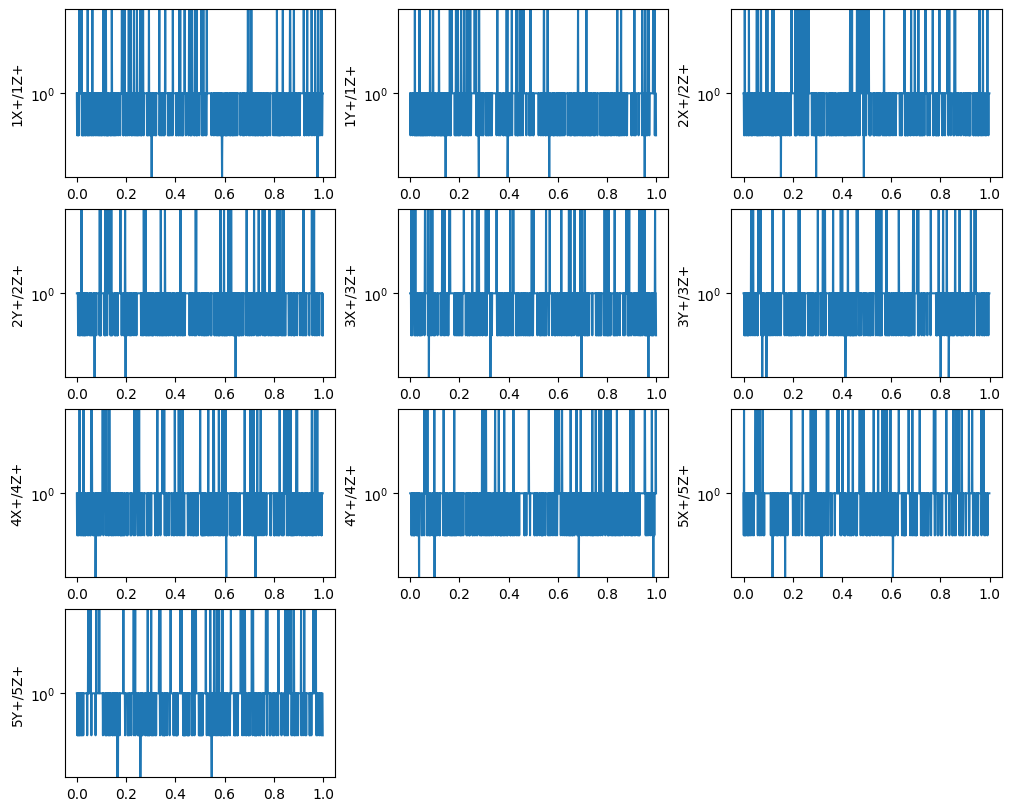

In [24]:
tfs.plot(one_axis=False,subplots_kwargs={'layout':'constrained','figsize':(10,8)})

array([[<Axes: ylabel='1X+/1Z+'>, <Axes: ylabel='1Y+/1Z+'>,
        <Axes: ylabel='2X+/2Z+'>],
       [<Axes: ylabel='2Y+/2Z+'>, <Axes: ylabel='3X+/3Z+'>,
        <Axes: ylabel='3Y+/3Z+'>],
       [<Axes: ylabel='4X+/4Z+'>, <Axes: ylabel='4Y+/4Z+'>,
        <Axes: ylabel='5X+/5Z+'>],
       [<Axes: ylabel='5Y+/5Z+'>, <Axes: >, <Axes: >]], dtype=object)

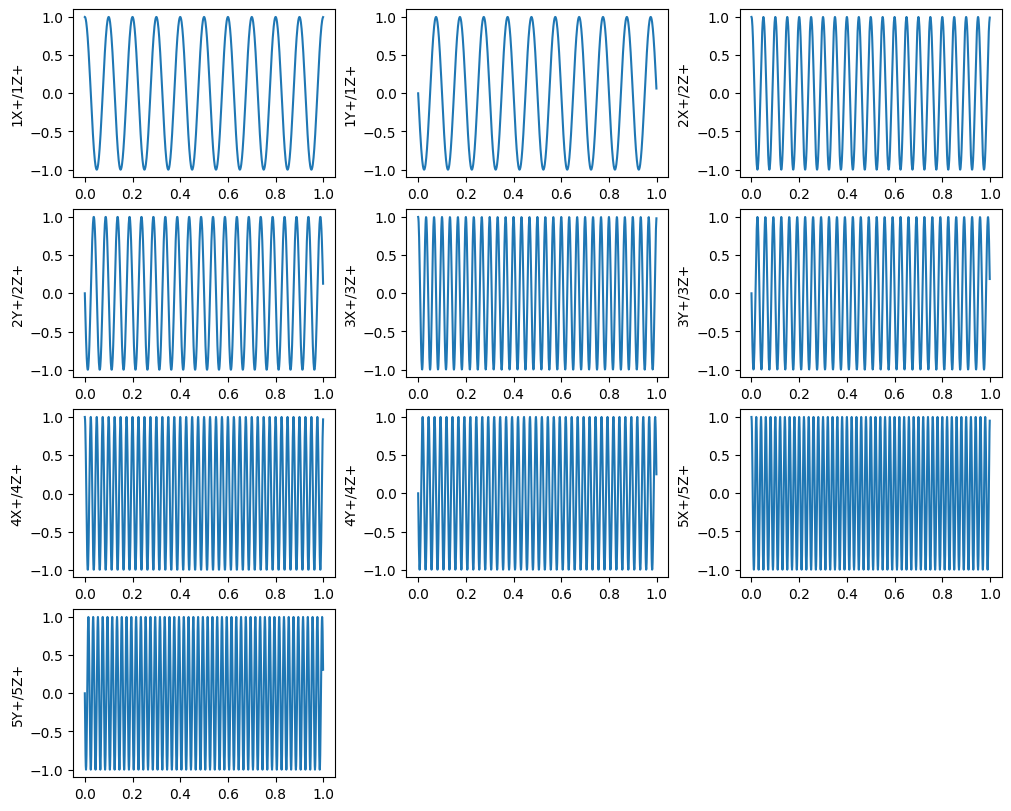

In [25]:
tfs.plot(one_axis=False,subplots_kwargs={'layout':'constrained','figsize':(10,8)},part='imag')

In [26]:
time_histories.gui_plot()

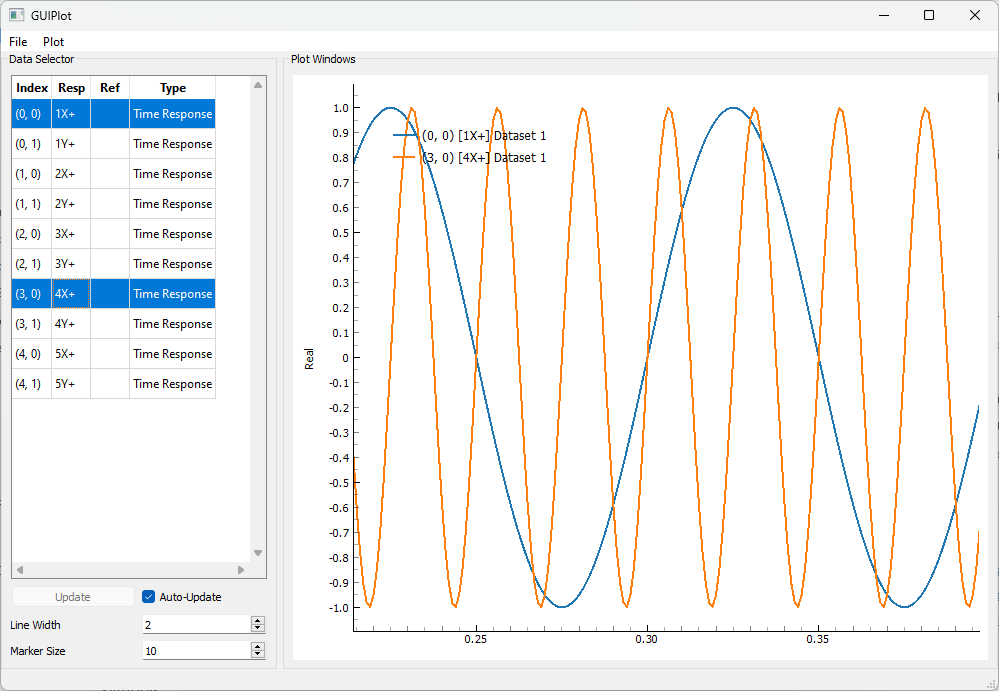


In [27]:
sdpy.GUIPlot(Sines = time_histories[:,0],Cosines = time_histories[:,1],
             abscissa_markers = [0,0.25,0.5],
             abscissa_marker_labels = ['0','1/4','1/2'],
             abscissa_marker_type = 'vline')

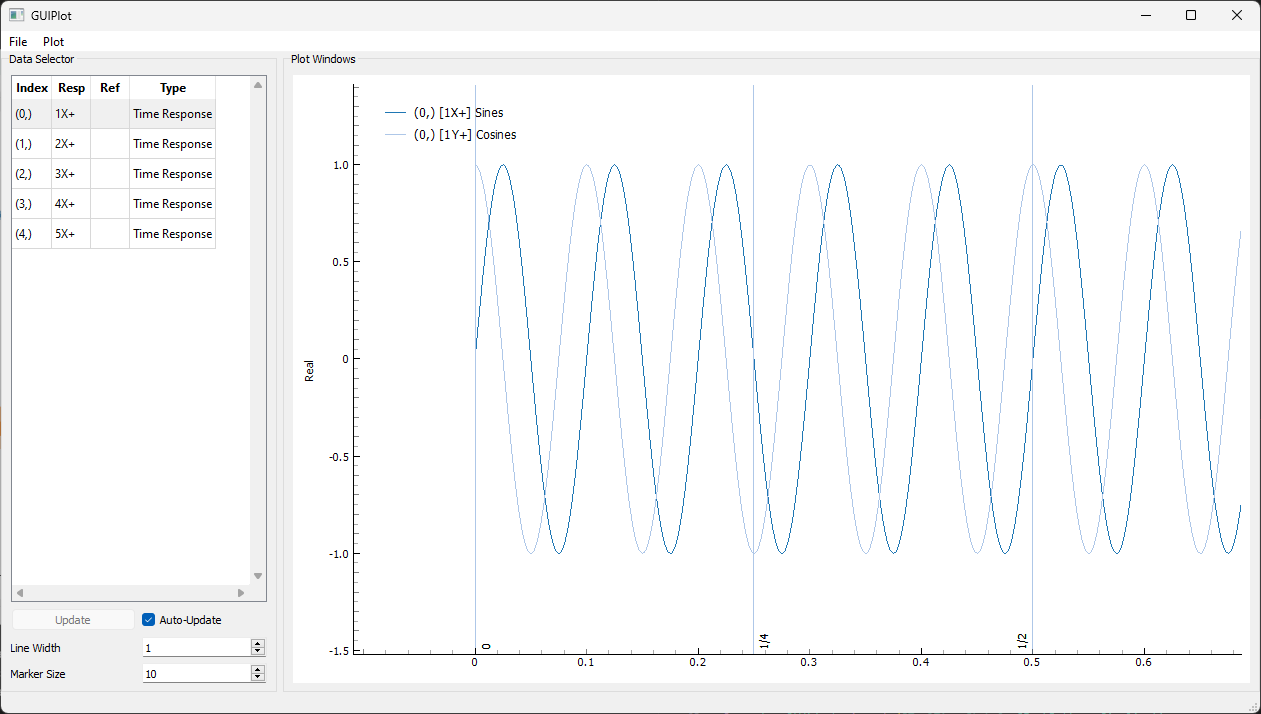

In [28]:
tfs.gui_plot()

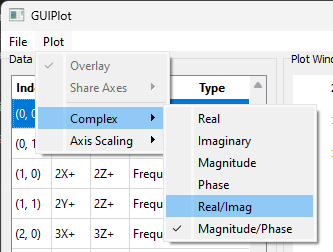

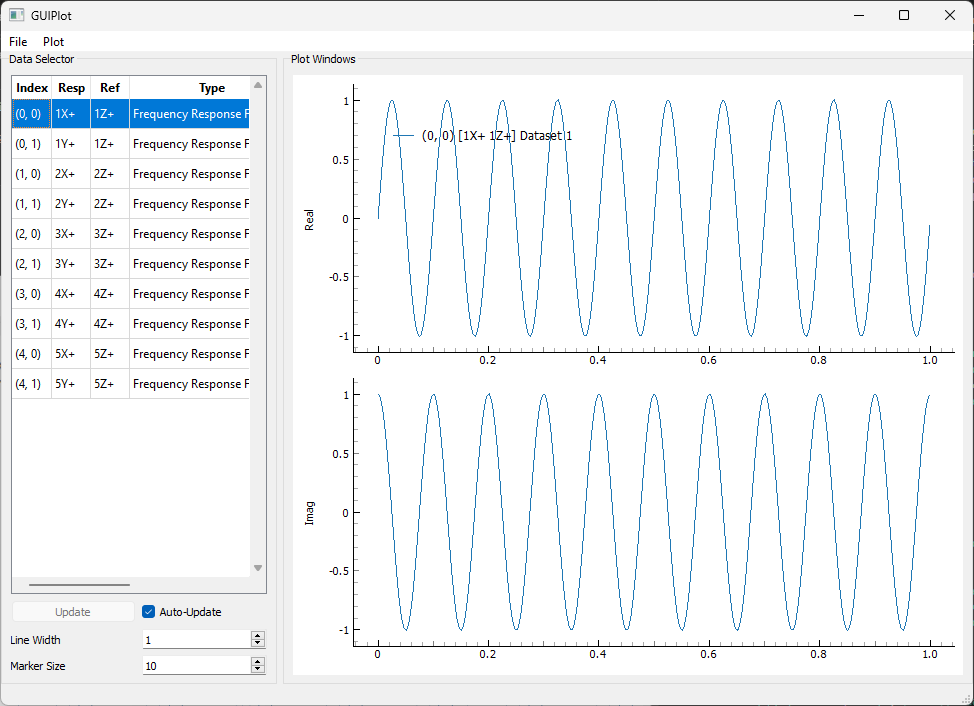

## Indexing NDDataArrays

In [29]:
time_histories

TimeHistoryArray with shape 5 x 2 and 1000 elements per function

In [30]:
time_histories[2,1]

TimeHistoryArray with shape  and 1000 elements per function

In [31]:
time_histories[0,:]

TimeHistoryArray with shape 2 and 1000 elements per function

In [32]:
time_histories[[0,3,4],[0,1,0]]

TimeHistoryArray with shape 3 and 1000 elements per function

While standard NumPy indexing can be used successfully, it can be error-prone.  Often, one is looking for a specific degree of freedom, and using NumPy indexing, one must first find the index corresponding to that degree of freedom.

In [33]:
# Define the coordinate we are looking for
desired_dof = sdpy.coordinate_array(1,'X+')

# Recall coordinate field is ... x 1, so this is why we do all across
# the last axis.
dof_matches = np.all(time_histories.coordinate == desired_dof,axis=-1)

print('Matching Coordinates:')
print(dof_matches)

# Select the time history with that coordinate
matching_time_history = time_histories[dof_matches]

print('\nFound Time History: ')
print(matching_time_history)
print('With Coordinate:')
print(matching_time_history.coordinate)

Matching Coordinates:
[[ True False]
 [False False]
 [False False]
 [False False]
 [False False]]

Found Time History: 
TimeHistoryArray with shape 1 and 1000 elements per function
With Coordinate:
[['1X+']]


This is passable; however it is many lines of code for a single operation.  Additionally, it does not generalize well to more interesting circumstances.  For example, what if we wanted to find the time history associated with the ``1X-`` direction?

In [34]:
# Define the coordinate we are looking for
desired_dof = sdpy.coordinate_array(1,'X-')

# Recall coordinate field is ... x 1, so this is why we do all across
# the last axis.
dof_matches = np.all(time_histories.coordinate == desired_dof,axis=-1)

print('Matching Coordinates:')
print(dof_matches)

# Select the time history with that coordinate
matching_time_history = time_histories[dof_matches]

print('\nFound Time History: ')
print(matching_time_history)
print('With Coordinate:')
print(matching_time_history.coordinate)

Matching Coordinates:
[[False False]
 [False False]
 [False False]
 [False False]
 [False False]]

Found Time History: 
TimeHistoryArray with shape 0 and 1000 elements per function
With Coordinate:
[]


In [35]:
# This has shape (3,))
desired_dofs = sdpy.coordinate_array([1,3,4],'X+')

# If we don't make it (3,1), the indexing operation will fail
time_histories[desired_dofs]


ValueError: Coordinate ['1X+' '3X+' '4X+'] not found in data array

In [36]:
# If we make it (3,1), then it will succeed
desired_dofs = desired_dofs[:,np.newaxis]
time_histories[desired_dofs].coordinate

coordinate_array(string_array=
array([['1X+'],
       ['3X+'],
       ['4X+']], dtype='<U3'))

As stated previously, this operation handles multidimensionality and sign flipping.  Let's set up an indexing operation that will pull the desired degrees of freedom while also exercising multidimensionality and sign flipping.

In [37]:
desired_dofs = sdpy.coordinate_array(
    [[3],[1],[4]], # 3x1
    ['X+','X-'],   # 1x2 (implicitly)
)[...,np.newaxis]  # add newaxis for 3x2x1

# We should get a 3x2 array, where the second column
# is the first column with the sign flipped.
desired_time_histories = time_histories[desired_dofs]

print(desired_time_histories)
print(desired_time_histories.coordinate)

TimeHistoryArray with shape 3 x 2 and 1000 elements per function
[[['3X+']
  ['3X-']]

 [['1X+']
  ['1X-']]

 [['4X+']
  ['4X-']]]


If we plot the functions, we should see that the different sign on the coordinate automatically flips the sign on the data as well.  We can also see that we have received the data in the same order as we requested it.  This enables very powerful indexing operations to be performed with minimal chance for bookkeeping errors.

array([[<Axes: ylabel='3X+'>, <Axes: ylabel='3X-'>],
       [<Axes: ylabel='1X+'>, <Axes: ylabel='1X-'>],
       [<Axes: ylabel='4X+'>, <Axes: ylabel='4X-'>]], dtype=object)

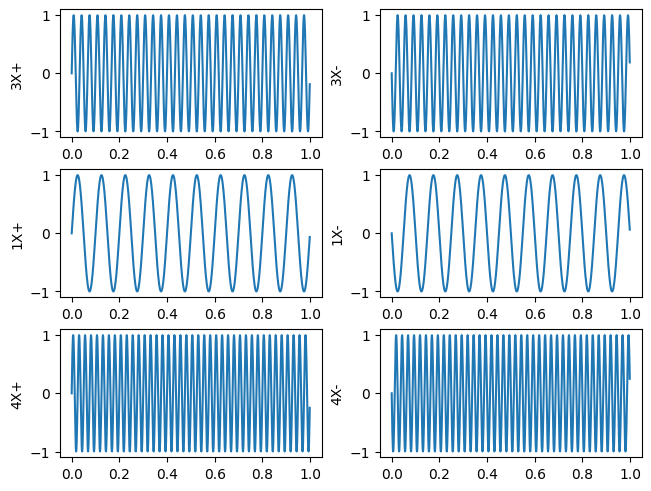

In [38]:
desired_time_histories.plot(one_axis=False,subplots_kwargs={'layout':'constrained'})

## Reading and Writing to NumPy Files

In [39]:
time_histories.save('time_histories.npz')

In [40]:
# Class method
time_histories_from_npz = sdpy.NDDataArray.load('time_histories.npz')
# Equivalent module-level alias
time_histories_from_npz = sdpy.data.load('time_histories.npz')

## Writing to Matlab Files

In [41]:
time_histories.savemat('time_histories.mat')

In [42]:
from scipy.io import loadmat
time_history_matlab_data = loadmat('time_histories.mat')

time_history_matlab_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'abscissa', 'ordinate', 'comment1', 'comment2', 'comment3', 'comment4', 'comment5', 'coordinate'])

## Summary